Importing packages


In [ ]:
import cv2
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_hist(img):
  #import Opencv
  import cv2

  # import Numpy
  import numpy as np
  
  # read a image using imread
  img = cv2.imread(img,)
  ycrcb_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
  ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
  # convert back to RGB color-space from YCrCb
  equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
  from google.colab.patches import cv2_imshow
  cv2_imshow(equalized_img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [ ]:
pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd 
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/medical_data/trainLabels.csv",nrows=400)
#data=pd.read_csv("")[:1000]

In [ ]:
len(data)

400

In [ ]:
data.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [ ]:
#adding .jpeg to each name of the image
data['image_name'] = [i+".jpeg" for i in data['image'].values]
data.head()

,image,level,image_name
0,10_left,0,10_left.jpeg
1,10_right,0,10_right.jpeg
2,13_left,0,13_left.jpeg
3,13_right,0,13_right.jpeg
4,15_left,1,15_left.jpeg


Histogram

0    296
2     57
1     24
4     15
3      8
Name: level, dtype: int64

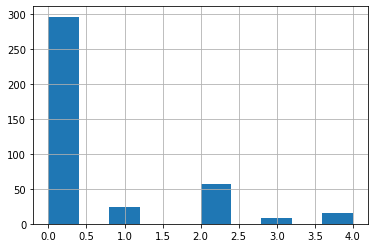

In [ ]:
data['level'].hist()
data['level'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[["image", "image_name"]]
y = data['level']#level is like output column

Splitting training and testing data

In [ ]:
train,val=train_test_split(data,test_size=0.15)

In [ ]:
train.shape, val.shape

((340, 3), (60, 3))

In [ ]:
train.head()

,image,level,image_name
38,47_left,0,47_left.jpeg
164,195_left,2,195_left.jpeg
62,65_left,0,65_left.jpeg
232,263_left,0,263_left.jpeg
363,418_right,0,418_right.jpeg


In [ ]:
val.head()

,image,level,image_name
65,66_right,0,66_right.jpeg
146,174_left,0,174_left.jpeg
353,406_right,4,406_right.jpeg
255,299_right,0,299_right.jpeg
154,184_left,2,184_left.jpeg


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

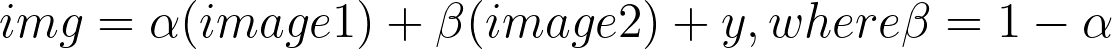

Adding Gausian image

In [ ]:
#cv2.addWeighted(img_src1, alpha, img_src2, beta, gamma, output_img, dtype=-1)
#output_img = img1 * alpha + img2 * beta + gamma
#beta=1-alfa
#sigmaX is the standard deviation in the X direction

#In Gaussian Blur operation, the image is convolved with a Gaussian filter instead of the box filter. 
#The Gaussian filter is a low-pass filter that removes the high-frequency components are reduced.
#based on alfa and beta value which means that one image will be four times more intense than the other
import cv2
def load_ben_color(image):
    IMG_SIZE = 224
    sigmaX=10
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
    return image

(683, 1024, 3)
Effect of Gausian Blurring


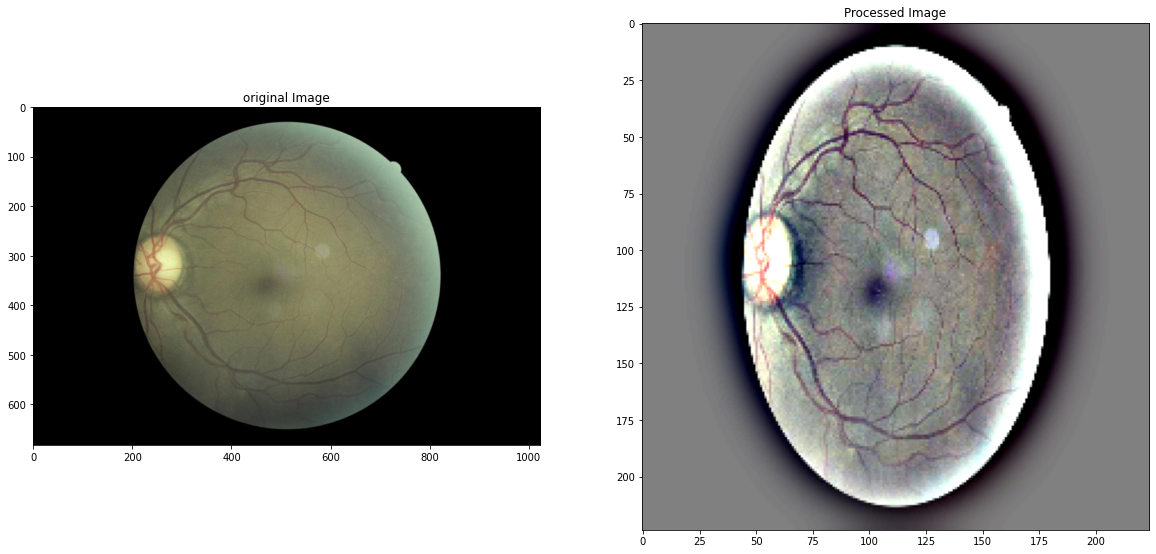

In [ ]:
original_image_1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/10007_left.jpeg',)
plt.figure(figsize=(20, 20))
original_image_1 = cv2.cvtColor(original_image_1, cv2.COLOR_BGR2RGB)
plt.subplot(121)
print(original_image_1.shape)
plt.title("original Image")
plt.imshow(original_image_1)

processed_image_1=load_ben_color(original_image_1)


plt.subplot(122)
plt.title("Processed Image")
plt.imshow(processed_image_1, cmap='gray')
print("Effect of Gausian Blurring")
plt.show()




#Applying Histogram equalization(method 1)

In [ ]:
import cv2
import numpy as np

def histogram_equalization(img):
    # Converting image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Calculating the cumulative distribution function
    cdf = np.cumsum(np.histogram(gray,1024,[0,1024])[0])
    cdf = cdf / cdf[-1]
    
    # Applying histogram equalization
    equalized_img = np.interp(gray, np.arange(0,1024), cdf)
    equalized_img = np.array(equalized_img * 255, dtype='uint8')
   
    
    return equalized_img

(683, 1024, 3)
Effect of Gausian Blurring


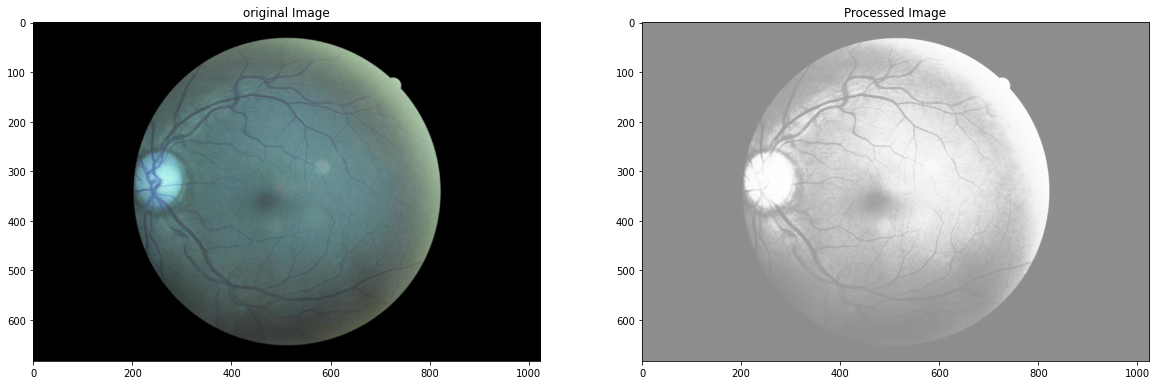

In [ ]:
# Load the retinal eye image
original_image_4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/10007_left.jpeg')


plt.figure(figsize=(20, 20))
_original_image_4 = cv2.cvtColor(original_image_4, cv2.COLOR_BGR2RGB)
plt.subplot(121)
print(original_image_4.shape)
plt.title("original Image")
plt.imshow(original_image_4)

# Apply histogram equalization
equalized_img_2 = histogram_equalization(original_image_4)
equalized_img_2 = cv2.cvtColor(equalized_img_2, cv2.COLOR_BGR2RGB)

plt.subplot(122)
plt.title("Processed Image")
plt.imshow(equalized_img_2)
print("Effect of Gausian Blurring")
plt.show()

In [ ]:
def load_hist(img):
  #import Opencv
  import cv2

  # import Numpy
  import numpy as np
  
  # read a image using imread
  img = cv2.imread(img,)
  ycrcb_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
  ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
  # convert back to RGB color-space from YCrCb
  equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
  from google.colab.patches import cv2_imshow
  cv2_imshow(equalized_img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

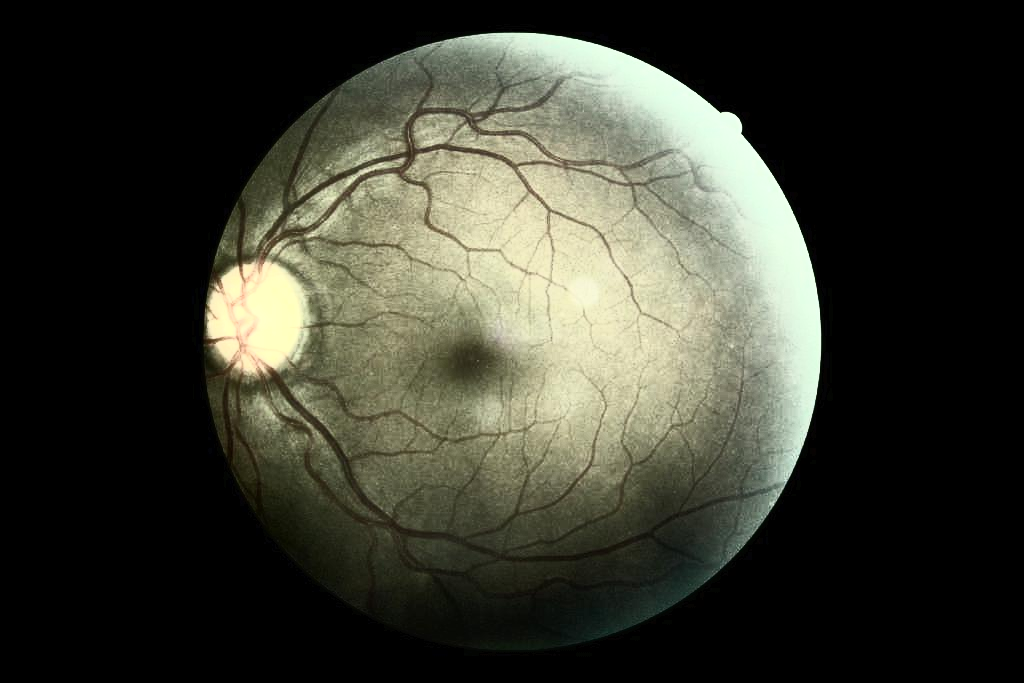

In [ ]:
load_hist('/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/10007_left.jpeg')

In [ ]:
import cv2
import numpy as np

def histogram_equalization_METH2(img):
    # Converting image to YCrCb color space
    ycrcb_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    
    # Perform histogram equalization on Y channel
    ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
    
    # Convert back to BGR color space
    equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
    
    return equalized_img

'''
# Load the retinal eye image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/10007_left.jpeg')

# Apply histogram equalization
equalized_img = histogram_equalization_METH2(img)
from google.colab.patches import cv2_imshow
# Display the original and equalized images
cv2_imshow(img)
cv2_imshow(equalized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

"\n# Load the retinal eye image\nimg = cv2.imread('/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/10007_left.jpeg')\n\n# Apply histogram equalization\nequalized_img = histogram_equalization_METH2(img)\nfrom google.colab.patches import cv2_imshow\n# Display the original and equalized images\ncv2_imshow(img)\ncv2_imshow(equalized_img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

(683, 1024, 3)
Effect of Gausian Blurring


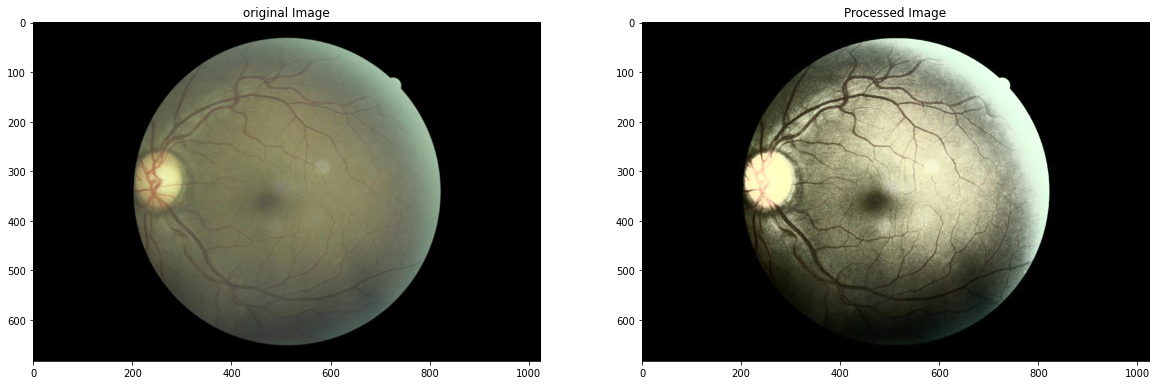

In [ ]:
# Load the retinal eye image
original_image_5 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/10007_left.jpeg')


plt.figure(figsize=(20, 20))
original_image_5 = cv2.cvtColor(original_image_5, cv2.COLOR_BGR2RGB)
plt.subplot(121)
print(original_image_5.shape)
plt.title("original Image")
plt.imshow(original_image_5)

# Apply histogram equalization
equalized_img_2 = histogram_equalization_METH2(original_image_5)
equalized_img_2 = cv2.cvtColor(equalized_img_2, cv2.COLOR_BGR2RGB)

plt.subplot(122)
plt.title("Processed Image")
plt.imshow(equalized_img_2)
print("Effect of Gausian Blurring")
plt.show()

#Applying Contrast Stretchig to normal unprocessed retina image


Image shape: (683, 1024)
Image dtype: uint8
Image min: 0
Image max: 251
Histogram min: 0.0
Histogram max: 373787.0
Intensity min: 0.0
Intensity max: 0.9843137
Stretched min: 0.0
Stretched max: 0.49604744


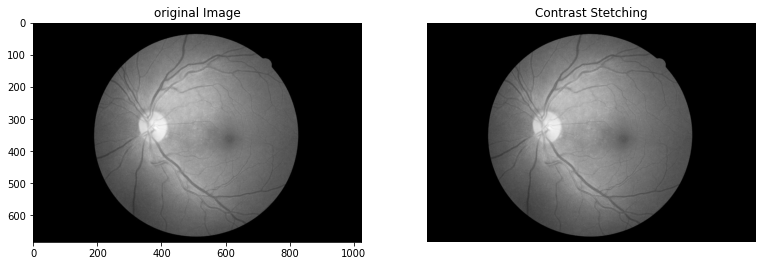

In [ ]:
import matplotlib.pyplot as plt

original_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/10003_left.jpeg")

original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20, 20))

plt.subplot(1,3,1)
plt.title("original Image")
plt.imshow(original_image,cmap='gray')
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/10003_left.jpeg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Image shape:", image.shape)
print("Image dtype:", image.dtype)
print("Image min:", image.min())
print("Image max:", image.max())

# Normalize the image intensity values
image = image.astype(np.float32) / 255.0

# Calculate the histogram of the image
hist = cv2.calcHist([image], [0], None, [256], [0, 1])
print("Histogram min:", hist.min())
print("Histogram max:", hist.max())

# Determine the minimum and maximum intensity values in the image
min_intensity = image.min()
max_intensity = image.max()
print("Intensity min:", min_intensity)
print("Intensity max:", max_intensity)

# Stretch the intensity values
image = (image - min_intensity) / (max_intensity - min_intensity + 1.0)

print("Stretched min:", image.min())
print("Stretched max:", image.max())

image = np.clip(image, 0, 1)

# Convert the image back to 8-bit format
image = (image * 255).astype(np.uint8)

# Display the processed image

plt.subplot(1,3,2)
plt.title("Contrast Stetching")
plt.imshow(image, cmap='gray', vmin=0, vmax=128)
plt.axis('off')


# Show the plot
plt.show()
# Load the image




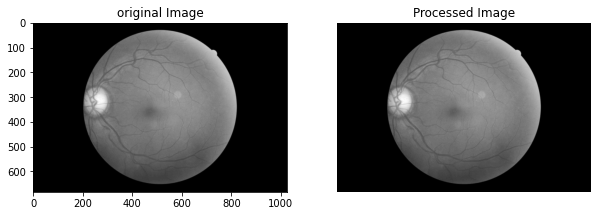

False


In [ ]:
import matplotlib.pyplot as plt
'''
original_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/10003_left.jpeg")

original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.title("original Image")
plt.imshow(original_image,cmap='gray')
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/10003_left.jpeg")
'''


def load_cs(image):
  #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Normalize the image intensity values
  image = image.astype(np.float32) / 255.0

  # Calculate the histogram of the image
  hist = cv2.calcHist([image], [0], None, [1792], [0, 1])
  
  # Determine the minimum and maximum intensity values in the image
  min_intensity = image.min()
  max_intensity = image.max()

  # Stretch the intensity values
  image = (image - min_intensity) / (max_intensity - min_intensity + 1.0)
  image = np.clip(image, 0, 1)

  # Convert the image back to 8-bit format
  image = (image * 255).astype(np.uint8)

  # Display the processed image
  return image

original_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/10007_left.jpeg',)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.title("original Image")
plt.imshow(original_image,cmap='gray')

processed_image=load_cs(original_image)




plt.subplot(122)
plt.title("Processed Image")
plt.imshow(processed_image, cmap='gray')
plt.axis('off')

plt.show()

from numpy import asarray
d1 = asarray(original_image)
d2=asarray(processed_image)
comparison = d1 == d2
equal_arrays = comparison.all()
print(equal_arrays)


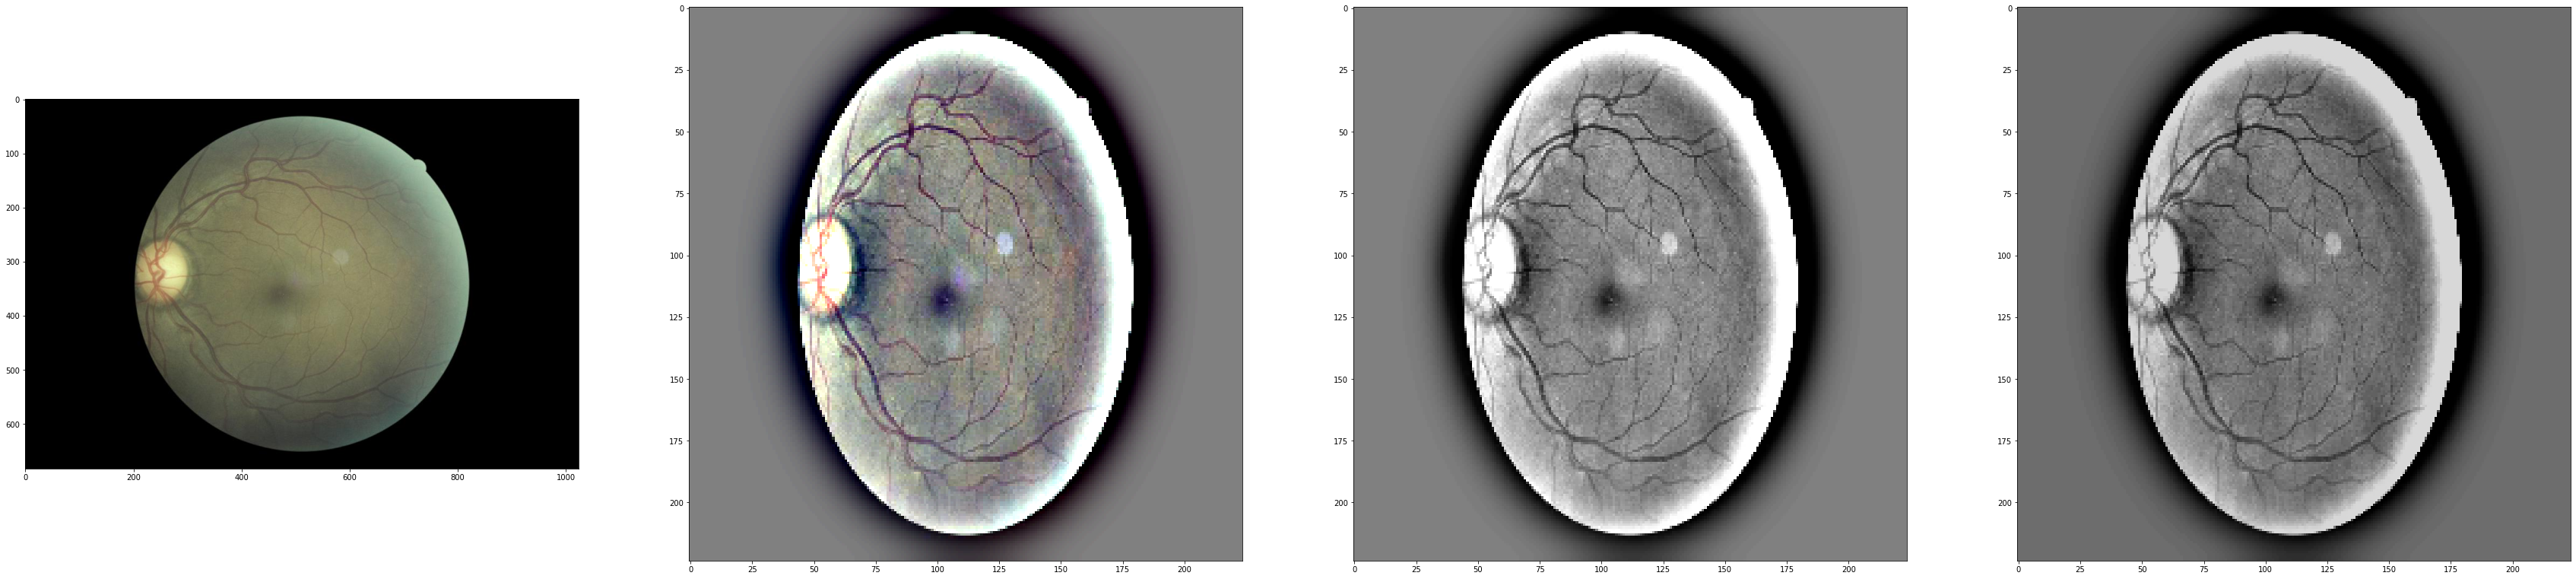

In [ ]:
plt.figure(figsize=(60, 60))
plt.subplot(1,4,1)
plt.imshow(original_image_1)
image1=cv2.cvtColor(processed_image_1, cv2.COLOR_BGR2GRAY)
image_output=load_cs(image1)
plt.subplot(1,4,2)
plt.imshow(processed_image_1, cmap='gray')
plt.subplot(1,4,3)
plt.imshow(image1, cmap='gray')
plt.subplot(1,4,4)
plt.imshow(image_output, cmap='gray',vmin=0,vmax=150)

(224, 224, 3)


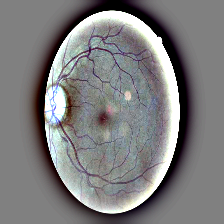

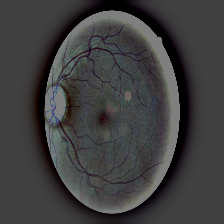

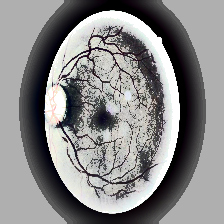

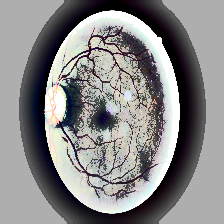

In [ ]:
# Apply histogram equalization
x=load_cs(processed_image_1)
print(x.shape)
equalized_img = histogram_equalization_METH2(x)
Y = histogram_equalization_METH2(processed_image_1)
from google.colab.patches import cv2_imshow
# Display the original and equalized images
cv2_imshow(processed_image_1)
cv2_imshow(x)
cv2_imshow(equalized_img)
cv2_imshow(Y)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
data_gen = ImageDataGenerator(rescale=1/255.,
                              zoom_range=0.15,
                              fill_mode='constant',
                              cval=0.,
                              horizontal_flip=True,
                              vertical_flip=True,
                              preprocessing_function=[load_ben_color,load_cs,histogram_equalization_METH2])

In [ ]:
# batch size
bs = 10

train_gen = data_gen.flow_from_dataframe(train, 
                                         "/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/",
                                         x_col="image_name", y_col="level", class_mode="raw",
                                         batch_size=bs,
                                         target_size=(224, 224))
val_gen = data_gen.flow_from_dataframe(val,
                                       "/content/drive/MyDrive/Colab Notebooks/medical_data/resized_train/resized_train/",
                                       x_col="image_name", y_col="level", class_mode="raw",
                                       batch_size=bs,
                                       target_size=(224, 224))

Found 340 validated image filenames.
Found 60 validated image filenames.
